<a href="https://colab.research.google.com/github/pigandfrog/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
#imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [0]:
#making matplotlib to be run inline
%matplotlib inline

In [0]:
#can choose what the style of matplotlib is by 
plt.style.use('fast')

In [65]:
#showing the options  for styles that are available for use
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-deep',
 'ggplot',
 'bmh',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-white',
 'seaborn',
 'seaborn-ticks',
 'seaborn-colorblind',
 'fast',
 'seaborn-notebook',
 'Solarize_Light2',
 'tableau-colorblind10',
 'fivethirtyeight',
 'seaborn-poster',
 'classic',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark',
 'grayscale',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-whitegrid']

In [66]:
#using the pandas built in visulalization:
#this is using the matplotlib but in pandas

#will first need to get the titanic dataframe
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [67]:
#checking the datatype of the Pclass column
df['Pclass'].dtype

dtype('int64')

In [68]:
#will create a new column that will hold the cabin class, but
# as a string
df["cabin_class"] = df['Pclass'].map({1:"first", 2: "second", 3: 'third'})
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


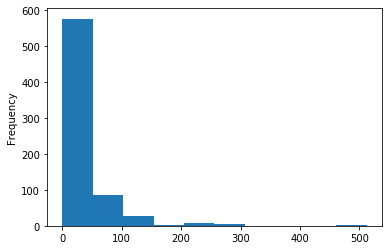

In [69]:
#this is making a histogram of the fares in the titanic
df['Fare'].plot(kind='hist' )

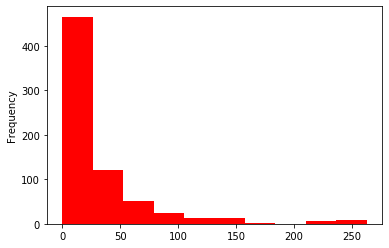

In [70]:
#removing the outliers
df = df[df['Fare']<500]
df['Fare'].plot(kind="hist", color='red')

In [0]:
#using binning to make the continous variable like "fare" more 
#categorical
fareBins = [0, 8, 15, 33,  512]
fareLabels = ["low", 'med', 'high', 'very_high']

df['fare_groups']= pd.cut(df["Fare"], 
                          bins=fareBins, labels=fareLabels)



In [0]:
#checking the bins that were made
myResults = df['fare_groups'].value_counts(ascending=False).sort_index()

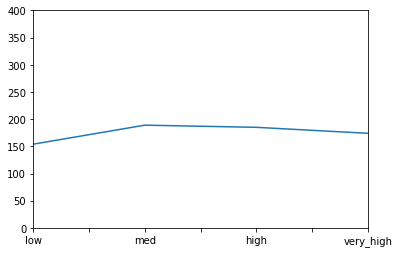

In [73]:
#plotting the results of binning the fares
#had
myResults.plot(ylim=(0, 400))

In [74]:
#displaying a continuous variable
# this is showing the range of the age feature
df['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

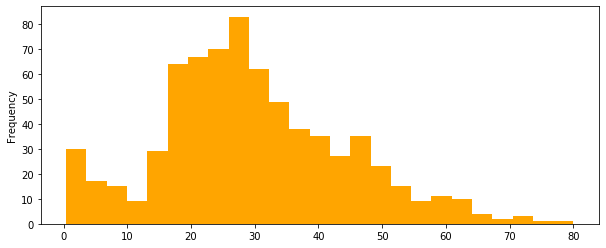

In [75]:
#plotting the age variable
df['Age'].plot(kind="hist", bins=25, figsize=(10,4), color="orange")

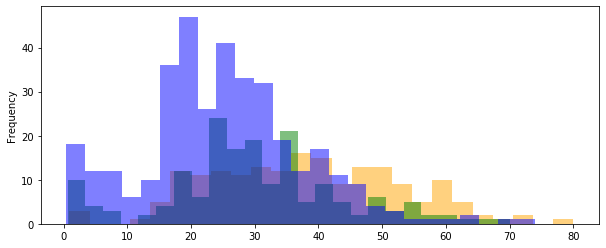

In [76]:
#comparing a contious by a categorical variable
df[df['cabin_class']== 'first'] ['Age'].plot(kind="hist", bins=25, figsize=(10,4), color="orange", alpha=.5)
df[df['cabin_class']== 'second'] ['Age'].plot(kind="hist", bins=25, figsize=(10,4), color="green", alpha=.5)
df[df['cabin_class']== 'third'] ['Age'].plot(kind="hist", bins=25, figsize=(10,4), color="blue", alpha=.5)


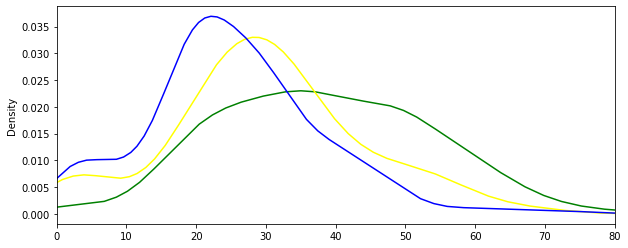

In [80]:
#using a kernel density estimate to show the three classes (categorical) with
#age as the continuous feature
df[df['cabin_class']=='first'] ['Age'].plot(kind="kde", color="green", xlim=(0,80), figsize=(10, 4))
df[df['cabin_class']=='second'] ['Age'].plot(kind="kde", color="yellow",xlim=(0,80), figsize=(10, 4))
df[df['cabin_class']=='third'] ['Age'].plot(kind="kde", color="blue",xlim=(0,80), figsize=(10, 4))

In [83]:
#we are going to plot a single categorical variable
df['fare_groups'].value_counts().sort_index()

low          154
med          189
high         185
very_high    174
Name: fare_groups, dtype: int64

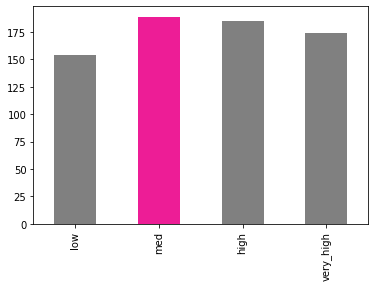

In [87]:
#plotting the categorical values
myResults.plot(kind="bar", color=['gray', '#ED1D96', 'gray', 'gray'])

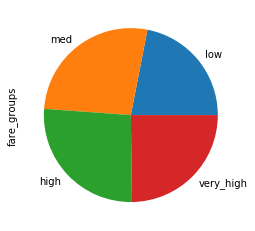

In [88]:
#making a pie chart using the categorical variables
myResults.plot(kind="pie")

In [95]:
#trying to compare two categorical variables
mCrossTab = pd.crosstab(df['cabin_class'], df['Survived'])
print(mCrossTab)

Survived       0    1
cabin_class          
first         64  117
second        90   83
third        270   85


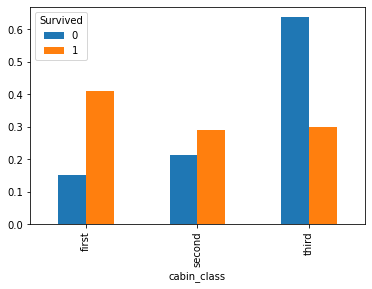

In [94]:
mCrossTab.plot(kind="bar")

In [96]:
#doing the crossTab but using normalize to make the percentages of 
#the amount survived
mCrossTab1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize="columns")
print(mCrossTab)

Survived       0    1
cabin_class          
first         64  117
second        90   83
third        270   85


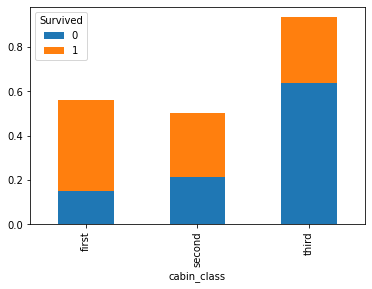

In [97]:
#making a stacked bar chart I left the colors as the default colors
mCrossTab1.plot(kind="bar", stacked=True)

In [99]:
#going to do the same type of crossTab, but this time going
#to normalize the rows
mCrossTab2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize="index")
mCrossTab2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


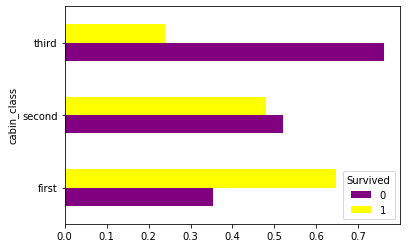

In [100]:
#going to make a horizontal bar chart
mCrossTab2.plot(kind="barh", colors=["purple", "yellow"])

In [102]:
#comparing a categorical with a continuous variable
#using a groupby method to make a dataframe with the mean age of each
#cabin_class
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

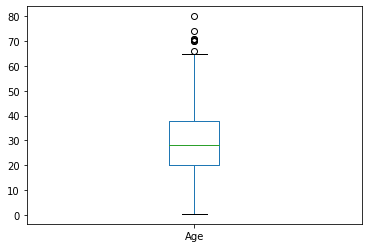

In [104]:
#now we want to try to visualize the dataframe of cab_age
#using the box
df["Age"].plot(kind="box")

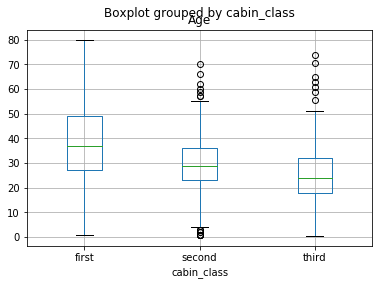

In [105]:
#this is graphing the continuous by a categorical using
#by the age 
df.boxplot(column="Age", by="cabin_class")

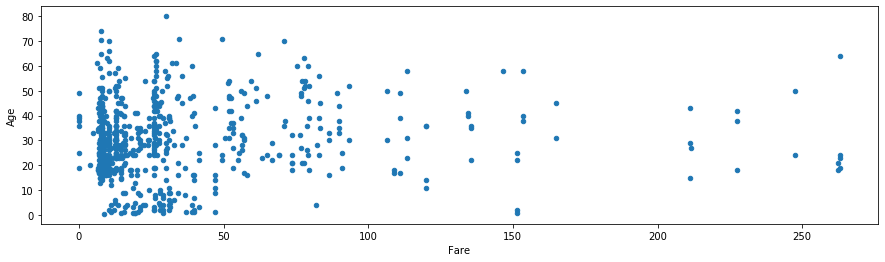

In [108]:
#now going to compare to continuous variables together
df.plot(kind="scatter", x='Fare', y="Age", figsize=(15, 4))

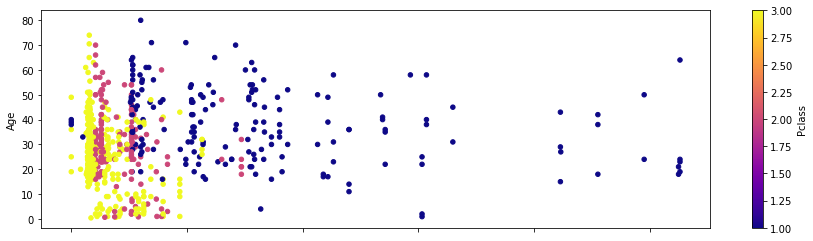

In [110]:
#trying to do 3 variables with a scatterplot
df.plot(kind="scatter", x="Fare", y="Age", c="Pclass", figsize=(15,4), colormap="plasma")

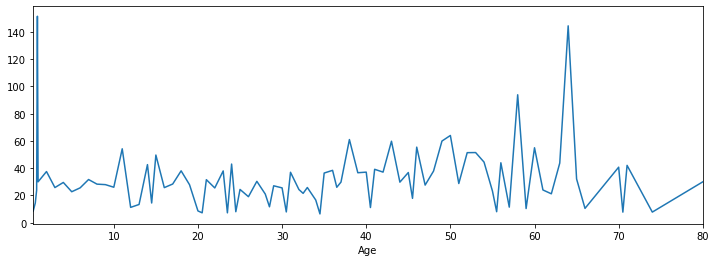

In [113]:
#using a line plot to look at two continous variables
df.groupby("Age")["Fare"].mean().plot(figsize=(12,4))

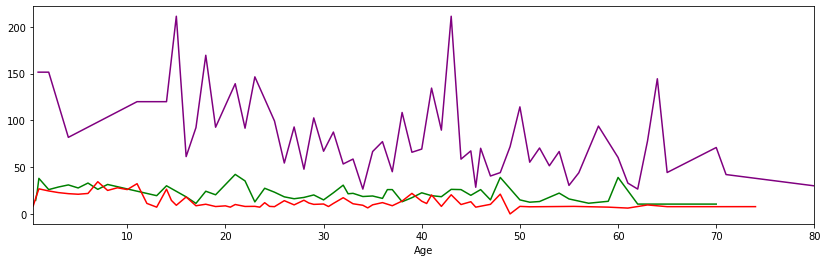

In [117]:

#creating a line plot that can have 3 lines on it
colorList=["purple", "green", "red"]
classes=['first', 'second', 'third']

#going to use a line plot but with 3 different variables
for i in range(3):
  df[df['cabin_class']== classes[i]].groupby('Age')['Fare'].mean().plot(color=colorList[i], figsize=(14,4))

In [118]:
#doing a crossMatrix so that we can then plot it using a heatmap
corMat = df.corr()
corMat

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


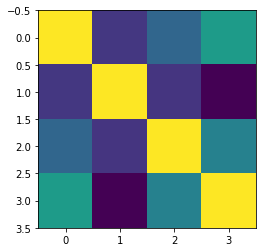

In [119]:
#displaying the cor matrix usin the heatmap
plt.imshow(corMat);

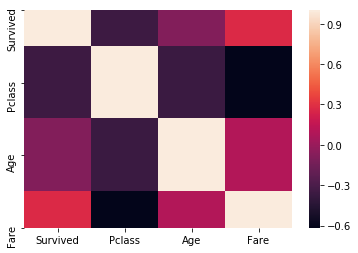

In [120]:
#doing the heatmap in seaborn
sns.heatmap(corMat)

In [123]:
#making some linear arrays to be able to plot
x = np.linspace(0,5,11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
#making another
y= x**2

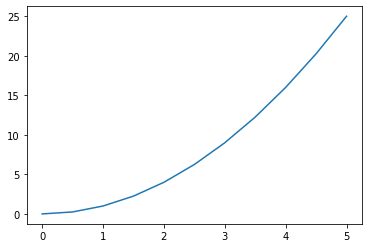

In [127]:
#doing some basic plotting with matplotlib
plt.plot(x,y)

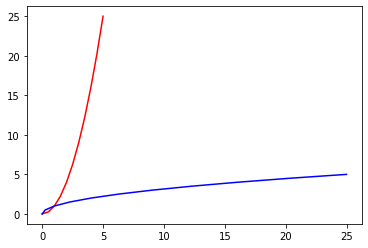

In [129]:
#putting tow plots together
plt.plot(x,y,"r")
plt.plot(y,x, "b")

Text(0.5, 1.0, 'My title')

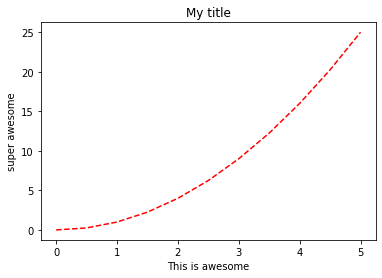

In [130]:
#messing with the features
plt.plot(x,y,"r--")
plt.xlabel("This is awesome")
plt.ylabel("super awesome")
plt.title("My title")

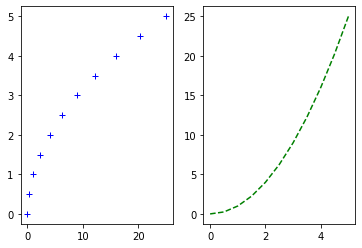

In [133]:
#creating some subplots
plt.subplot(1,2,1)
plt.plot(y,x,"b+")
plt.subplot(1,2,2)
plt.plot(x, y, "g--")

Text(0.5, 1.0, 'the title')

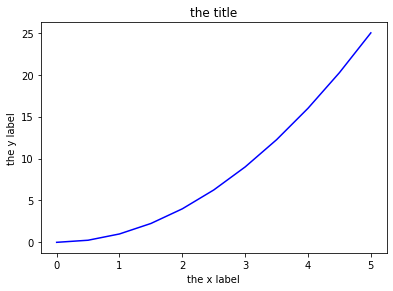

In [135]:
#creating a figure and then getting an axes for it and then plotting it
fig = plt.figure()
axes = fig.add_axes([.1,.1, .8, .8])

#plot on the axes
axes.plot(x,y, "b")
axes.set_xlabel("the x label")
axes.set_ylabel("the y label")
axes.set_title("the title")

Text(0.5, 1.0, 'the title')

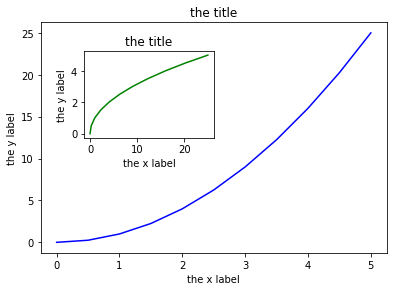

In [137]:
fig = plt.figure()

axes1 = fig.add_axes([.1, .1, .8, .8])
axes2 = fig.add_axes([.2, .5, .3, .3]) #this one will be inside the other one

axes1.plot(x,y,"b")
axes1.set_xlabel("the x label")
axes1.set_ylabel("the y label")
axes1.set_title("the title")

axes2.plot(y,x, 'g')
axes2.set_xlabel("the x label")
axes2.set_ylabel("the y label")
axes2.set_title("the title")



Text(0.5, 1.0, 'the title')

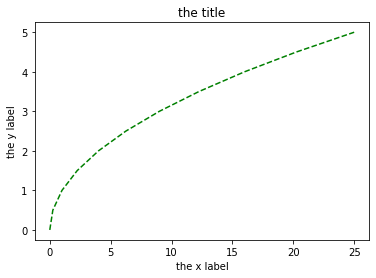

In [140]:
fig, ax = plt.subplots()

ax.plot(y,x,"g--")
ax.set_xlabel("the x label")
ax.set_ylabel("the y label")
ax.set_title("the title")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30c70c6a20>,
      dtype=object)

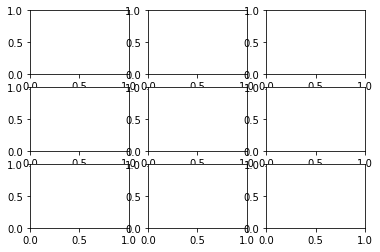

In [143]:
#creating several subplots by giving the subplot method a number of rows and columns
fig, axes = plt.subplots(nrows=3, ncols=3)
axes

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30c70c6a20>


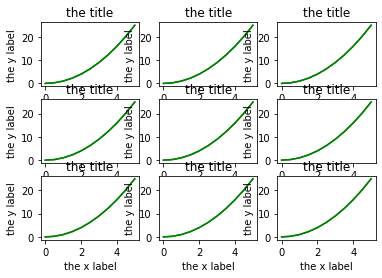

In [150]:
#printing out a bunch of the graphs
type(axes)
print(axes)

for axe in axes:
  for ax in axe:
    ax.plot(x,y, 'g')
    ax.set_xlabel("the x label")
    ax.set_title("the title")
    ax.set_ylabel("the y label")

fig  

In [0]:
#recreating the 538 style of the example
plt.style.use("fivethirtyeight")

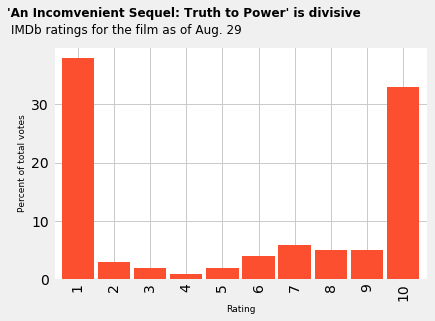

In [153]:
#creating the data to go in the bar chart
fake= pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1, 11))

fig, ax = plt.subplots()

ax.set(facecolor="white")
#putting in some text
ax.set_title("'An Incomvenient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight="bold")

ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12,
        x=-1.85,
        y=42)
ax.set_ylabel("Percent of total votes", fontsize=9)
ax.set_xlabel("Rating", fontsize=9)

#setting the ticks
ax.set_yticks(range(0,50,10))
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
#plotting the fake barchart
fake.plot.bar(color="C1", width=.9);

In [156]:
#trying to copy onne of the predsdentinial polls from five thirty eight
url = "https://projects.fivethirtyeight.com/polls-page/president_approval_polls.csv"
dff = pd.read_csv(url)
dff.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,112849,62586,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B-,1000,a,a,Online,11/6/19,11/7/19,NaN,NaN,11/7/19 17:25,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,41.0,51.0
1,112850,62586,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B-,767,rv,rv,Online,11/6/19,11/7/19,NaN,NaN,11/7/19 17:25,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,43.0,54.0
2,112839,62577,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B-,1000,a,a,Online,11/5/19,11/6/19,NaN,NaN,11/7/19 00:10,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,52.0
3,112840,62577,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,391.0,YouGov,B-,746,rv,rv,Online,11/5/19,11/6/19,NaN,NaN,11/7/19 00:10,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,46.0,52.0
4,112846,62583,2019.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,lv,IVR/Online,11/4/19,11/6/19,NaN,True,11/7/19 09:29,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,50.0,49.0


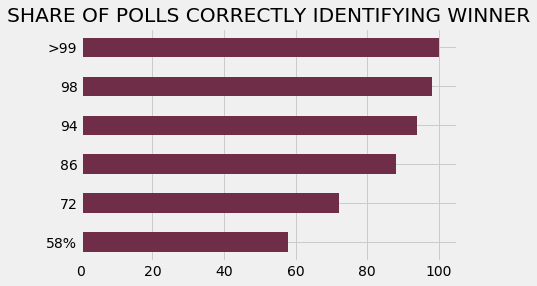

In [161]:
#copying one of the fivethirty eight diagrams
fig, ax = plt.subplots()

ax.set_title("SHARE OF POLLS CORRECTLY IDENTIFYING WINNER")
s = pd.Series([58, 72, 88, 94, 98, 100], 
              index=["58%", "72", "86", "94", "98", ">99"])
s.plot(kind="barh", color="#702d47")

#the source of this bar horizontal is from the blog "The State of the Polls, 2019"

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here